In [34]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from ch3_classes import LogisticRegressionGD

In [3]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')

In [4]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [5]:
print(f"""Class labels: {np.unique(y)}""")

Class labels: [0 1 2]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
print(f"""Label counts in y: {np.bincount(y)}""")
print(f"""Label counts in y_train: {np.bincount(y_train)}""")
print(f"""Label counts in y_test: {np.bincount(y_test)}""")

Label counts in y: [50 50 50]
Label counts in y_train: [35 35 35]
Label counts in y_test: [15 15 15]


In [8]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [10]:
y_pred = ppn.predict(X_test_std)

In [11]:
print(f"""Misclassed examples: {(y_test != y_pred).sum()}""")

Misclassed examples: 1


In [12]:
print(f"""Accuracy: {accuracy_score(y_test, y_pred):.3f}""")

Accuracy: 0.978


In [13]:
print(f"""Accuracy: {ppn.score(X_test_std, y_test):.3f}""")

Accuracy: 0.978


In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [15]:
X_combined_std

array([[-1.33269725, -1.30728421],
       [-1.16537974, -1.30728421],
       [ 0.84243039,  1.44587881],
       [ 1.0655204 ,  1.18367281],
       [-1.44424226, -1.30728421],
       [ 1.0097479 ,  1.57698181],
       [ 1.56747294,  1.18367281],
       [-1.44424226, -1.30728421],
       [ 1.12129291,  0.5281578 ],
       [ 0.45202286,  0.1348488 ],
       [-0.27301968, -0.2584602 ],
       [ 0.06161534,  0.2659518 ],
       [-1.38846976, -1.30728421],
       [ 0.50779537,  0.0037458 ],
       [ 0.11738784,  0.1348488 ],
       [ 0.73088538,  0.92146681],
       [-1.05383474, -1.30728421],
       [-0.16147468, -0.2584602 ],
       [ 0.06161534,  0.0037458 ],
       [-1.22115225, -1.30728421],
       [ 0.56356787,  0.79036381],
       [ 1.73479045,  1.44587881],
       [ 0.39625036,  0.3970548 ],
       [ 0.39625036,  0.1348488 ],
       [ 0.00584283, -0.1273572 ],
       [ 1.0097479 ,  1.57698181],
       [ 0.50779537,  0.2659518 ],
       [ 1.0097479 ,  0.2659518 ],
       [ 1.12129291,

In [16]:
y_combined

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1,
       1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1,
       2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0])

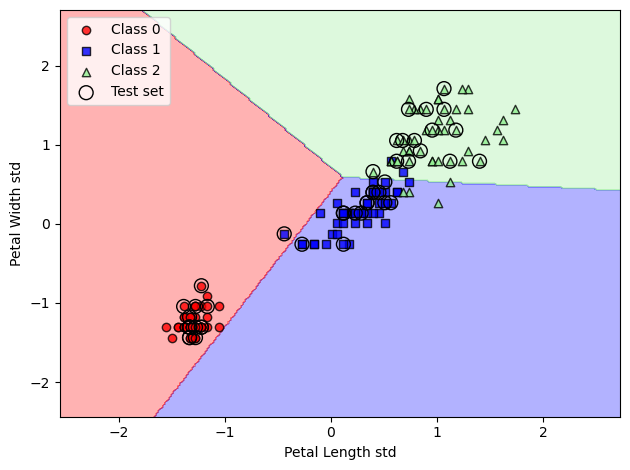

In [17]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel("Petal Length std")
plt.ylabel("Petal Width std")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]

In [21]:
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [22]:
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)

In [23]:
lrgd.fit(X_train_01_subset, y_train_01_subset)

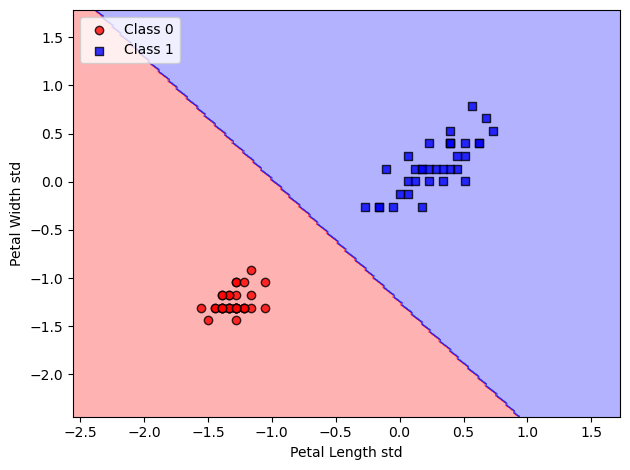

In [24]:
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel("Petal Length std")
plt.ylabel("Petal Width std")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

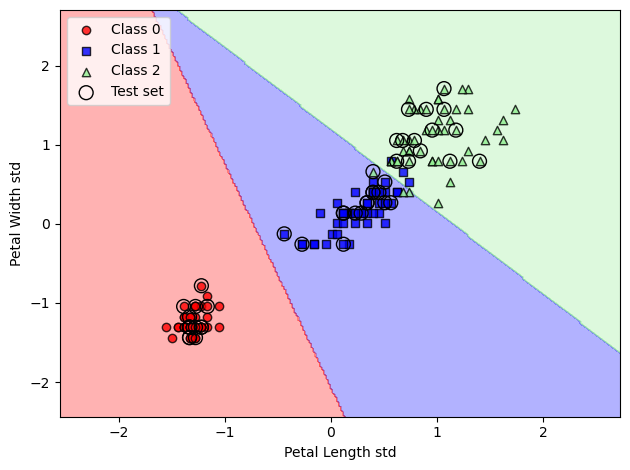

In [26]:
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel("Petal Length std")
plt.ylabel("Petal Width std")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [27]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [28]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [29]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

IndexError: index 150 is out of bounds for axis 0 with size 150

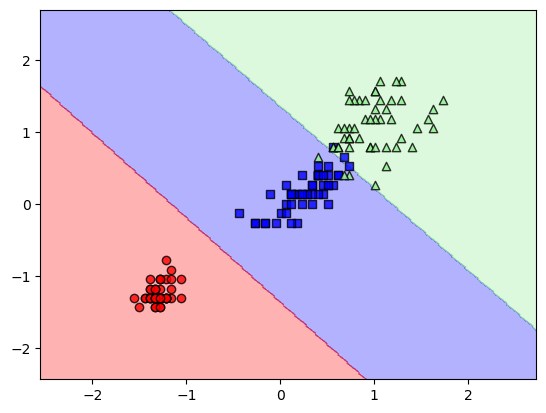

In [33]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=(105, 150))
plt.xlabel("Petal Length std")
plt.ylabel("Petal Width std")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [35]:
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

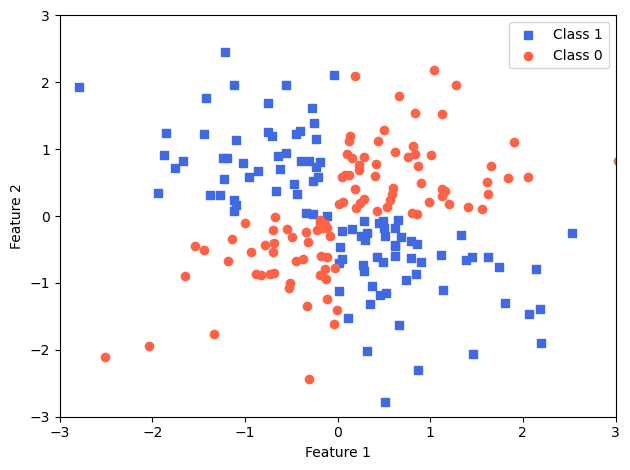

In [36]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue',
            marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato',
            marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc='best')
plt.tight_layout()
plt.show()

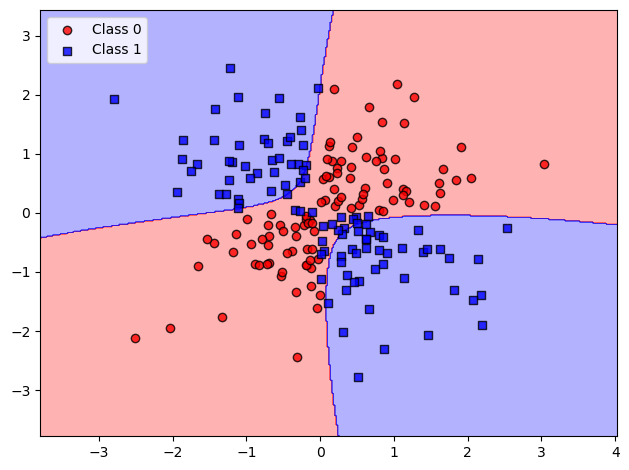

In [39]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

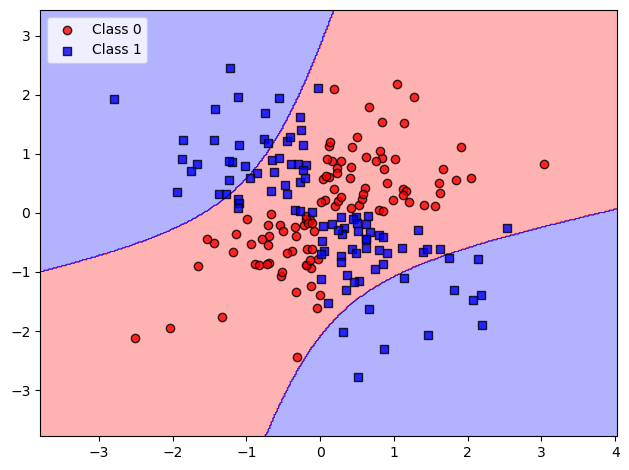

In [40]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.01, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

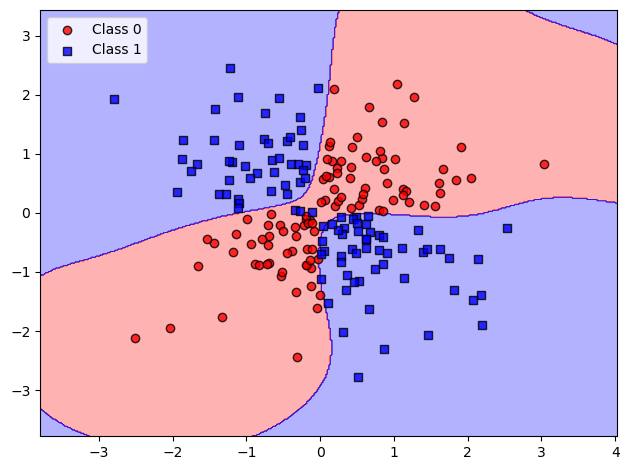

In [41]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.5, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

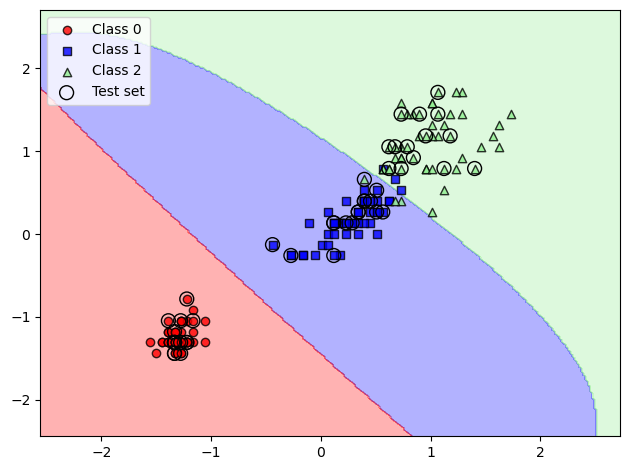

In [42]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

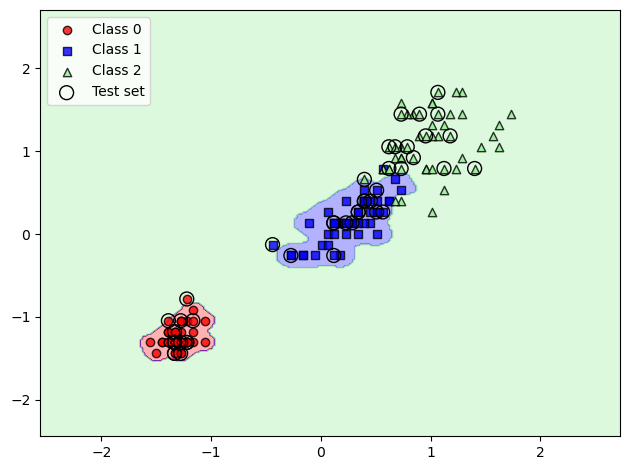

In [43]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()